## pandas 를 이용한 데이터프레임 다루기

### Pandas (Python Data Analytics Library) 불러오기

In [ ]:
import pandas as pd

print(pd.__version__)

2.2.3


- <b>데이터프레임(DataFrame)</b>: 여러 개의 연속된 값으로 이뤄진 시리즈(series)를 하나의 열로 가지고 있는 데이터 구조. 데이터프레임은 열과 행으로 구성되며, 0번째부터 인덱스가 시작된다.

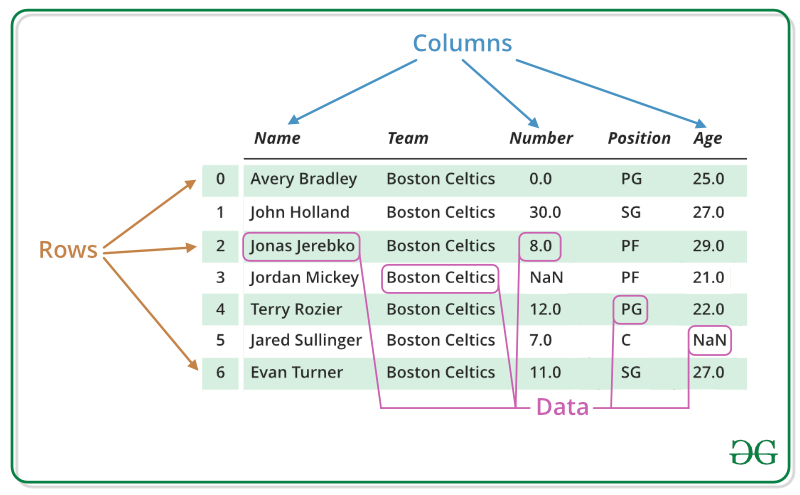

### List로부터 Series로 변환하기

In [ ]:
data1 = ['a', 'b', 'c', 'd', 'e']

In [ ]:
data1[0]

'a'

In [ ]:
print(data1)
print("자료형: ", type(data1))

#이 줄이 제일 중요해요!
sr1 = pd.Series(data1)
print("자료형: ", type(sr1))

print(sr1)

['a', 'b', 'c', 'd', 'e']
자료형:  <class 'list'>
자료형:  <class 'pandas.core.series.Series'>
0    a
1    b
2    c
3    d
4    e
dtype: object


### Series 인덱싱 하기

In [ ]:
# 0번째 인덱스에 있는 데이터 가져오기
sr1.loc[0]

'a'

In [ ]:
# 1~3번째 가져오기
sr1.loc[1:3]

1    b
2    c
3    d
dtype: object

### 데이터프레임 생성하기

In [1]:
import pandas as pd

data = {'age':[20, 33, 48], 'height':[183, 179, 169], 'weight':[77.2, 79.4, 55.5]}
print(type(data))

#df = pd.DataFrame(data)
df = pd.DataFrame(data=data)
print(type(df))
df

<class 'dict'>
<class 'pandas.core.frame.DataFrame'>


,age,height,weight
0,20,183,77.2
1,33,179,79.4
2,48,169,55.5


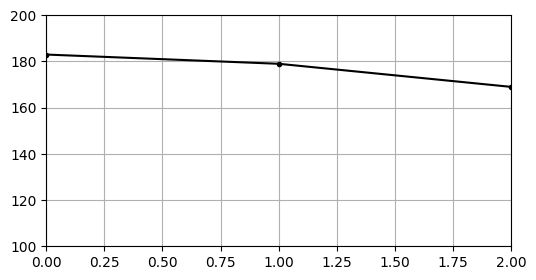

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
plt.plot(df.index, df.height, linestyle='-', marker='.', color='black')
plt.xlim(0, 2)
plt.ylim(100, 200)
plt.grid()
plt.show()

<Axes: >

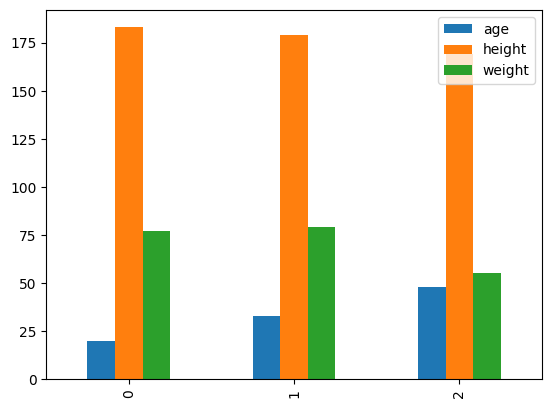

In [3]:
df.plot(kind='bar')

In [4]:
# 데이터프레임의 컬럼명 바꾸기
print(df.columns)
df.columns = ['one', 'two', 'three']

Index(['age', 'height', 'weight'], dtype='object')


In [5]:
df2 = pd.DataFrame(columns = ['Name', 'Title', 'Affiliation'])
df2

,Name,Title,Affiliation


pd.DataFrame(index=인덱스명, data=데이터, columns=[컬럼명1, 컬럼명2, ...])

### 데이터프레임의 열이나 인덱스를 추출하고, 바꾸기

In [6]:
df.shape

(3, 3)

In [7]:
print(df.columns, df.index)

Index(['one', 'two', 'three'], dtype='object') RangeIndex(start=0, stop=3, step=1)


In [8]:
df.columns = ['lb', 'size', 'pnd'] # 컬럼명 수정하기
df.index = [0, 100, 200] # 인덱스 수정하기
df

,lb,size,pnd
0,20,183,77.2
100,33,179,79.4
200,48,169,55.5


In [9]:
df

,lb,size,pnd
0,20,183,77.2
100,33,179,79.4
200,48,169,55.5


In [10]:
df.reset_index(drop=True, inplace=True)
#inplace 옵션을 넣지 않으면 데이터프레임에 반영되지 않는다.
#drop 옵션은 원래 있던 인덱스를 제거하는지를 묻는 것이다.
df

,lb,size,pnd
0,20,183,77.2
1,33,179,79.4
2,48,169,55.5


### 데이터프레임의 특정 컬럼이나 열, 값을 가져오기

In [44]:
# 'lb'라는 이름의 열을 가져오기
df['lb']

0    20
1    33
2    48
Name: lb, dtype: int64

- loc 및 iloc 메소드

In [48]:
df.loc[1:2, 'pnd']

1    79.4
2    55.5
Name: pnd, dtype: float64

In [49]:
df.iloc[:, :2]

,lb,size
0,20,183
1,33,179
2,48,169


In [50]:
df.iloc[:, [0, 2]]

,lb,pnd
0,20,77.2
1,33,79.4
2,48,55.5


In [21]:
df

,lb,size,pnd
0,20,183,77.2
1,33,179,79.4
2,48,169,55.5


In [52]:
df.loc[1, :]

lb       33.0
size    179.0
pnd      79.4
Name: 1, dtype: float64

### 행이나 열 추가 또는 삭제하기

In [53]:
# 열 추가하기
iq = [120, 140, 133]
df['iq'] = iq
df

,lb,size,pnd,iq
0,20,183,77.2,120
1,33,179,79.4,140
2,48,169,55.5,133


In [56]:
df['weight'] = 0

In [57]:
df

,lb,size,pnd,iq,weight
0,20,183,77.2,120,0
1,33,179,79.4,140,0
2,48,169,55.5,133,0


In [58]:
len(df)

3

In [59]:
df.shape

(3, 5)

In [61]:
# 행 추가하기
df.loc[len(df)] = [55, 175, 66.1, 129, 129]
df

,lb,size,pnd,iq,weight
0,20.0,183.0,77.2,120.0,0.0
1,33.0,179.0,79.4,140.0,0.0
2,48.0,169.0,55.5,133.0,0.0
3,55.0,175.0,66.1,129.0,129.0


In [62]:
# 특정 행 삭제하기
df.drop(1, axis=0) #axis=0이면 행, axis=1이면 열

,lb,size,pnd,iq,weight
0,20.0,183.0,77.2,120.0,0.0
2,48.0,169.0,55.5,133.0,0.0
3,55.0,175.0,66.1,129.0,129.0


In [64]:
df.drop(1, axis=0, inplace=True)

In [65]:
df

,lb,size,pnd,iq,weight
0,20.0,183.0,77.2,120.0,0.0
2,48.0,169.0,55.5,133.0,0.0
3,55.0,175.0,66.1,129.0,129.0


In [66]:
df.reset_index(drop=True, inplace=True)

In [67]:
df

,lb,size,pnd,iq,weight
0,20.0,183.0,77.2,120.0,0.0
1,48.0,169.0,55.5,133.0,0.0
2,55.0,175.0,66.1,129.0,129.0


In [38]:
df.loc[1, 'size']

169.0

In [68]:
# 특정 열 삭제하기
df.drop('iq', axis=1)

,lb,size,pnd,weight
0,20.0,183.0,77.2,0.0
1,48.0,169.0,55.5,0.0
2,55.0,175.0,66.1,129.0


## 엑셀 파일 읽어오기

In [ ]:
!pip install xlrd openpyxl

In [74]:
import pandas as pd

df = pd.read_excel('seoul_daily_temp.xlsx')

In [83]:
df.shape

(7305, 7)

In [82]:
df.tail()

,Date,Avg_Temp,High_Temp,High_Time,Low_Temp,Low_Time,Diff
7300,2022-12-27,-2.6,3.3,15:15:00,-7.3,07:20:00,10.6
7301,2022-12-28,-3.3,0.1,14:53:00,-6.0,23:55:00,6.1
7302,2022-12-29,-2.9,2.1,15:22:00,-7.8,07:28:00,9.9
7303,2022-12-30,-1.8,2.3,13:54:00,-4.4,23:55:00,6.7
7304,2022-12-31,-1.2,2.1,15:30:00,-5.1,01:25:00,7.2


In [84]:
df.describe()

,Date,Avg_Temp,High_Temp,Low_Temp,Diff
count,7305,7305.000000,7304.000000,7304.000000,7303.000000
mean,2012-12-31 00:00:00.000000256,13.014442,17.593483,9.122029,8.469930
min,2003-01-01 00:00:00,-14.900000,-10.700000,-18.600000,1.100000
25%,2008-01-01 00:00:00,4.200000,8.400000,0.300000,6.500000
50%,2012-12-31 00:00:00,14.400000,19.400000,9.900000,8.500000
75%,2017-12-31 00:00:00,22.400000,26.900000,18.700000,10.400000
max,2022-12-31 00:00:00,33.700000,39.600000,30.300000,18.500000
std,NaN,10.532264,10.696170,10.658434,2.866788


### 데이터프레임 검색하기

In [40]:
!pip install plotly

DEPRECATION: mecab-python 0.996-ko-0.9.2 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of mecab-python or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [86]:
import pandas as pd
import plotly.express as px

df = px.data.gapminder()
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [87]:
df.shape

(1704, 8)

In [88]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
       'iso_alpha', 'iso_num'],
      dtype='object')

In [93]:
df2 = df[df['country'] == 'Japan']

In [94]:
df2

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
792,Japan,Asia,1952,63.030,86459025,3216.956347,JPN,392
793,Japan,Asia,1957,65.500,91563009,4317.694365,JPN,392
794,Japan,Asia,1962,68.730,95831757,6576.649461,JPN,392
795,Japan,Asia,1967,71.430,100825279,9847.788607,JPN,392
796,Japan,Asia,1972,73.420,107188273,14778.786360,JPN,392
797,Japan,Asia,1977,75.380,113872473,16610.377010,JPN,392
798,Japan,Asia,1982,77.110,118454974,19384.105710,JPN,392
799,Japan,Asia,1987,78.670,122091325,22375.941890,JPN,392
800,Japan,Asia,1992,79.360,124329269,26824.895110,JPN,392
801,Japan,Asia,1997,80.690,125956499,28816.584990,JPN,392


In [95]:
kor_df = df[df['iso_alpha'] == 'KOR']
kor_df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
828,"Korea, Dem. Rep.",Asia,1952,50.056,8865488,1088.277758,KOR,410
829,"Korea, Dem. Rep.",Asia,1957,54.081,9411381,1571.134655,KOR,410
830,"Korea, Dem. Rep.",Asia,1962,56.656,10917494,1621.693598,KOR,410
831,"Korea, Dem. Rep.",Asia,1967,59.942,12617009,2143.540609,KOR,410
832,"Korea, Dem. Rep.",Asia,1972,63.983,14781241,3701.621503,KOR,410
833,"Korea, Dem. Rep.",Asia,1977,67.159,16325320,4106.301249,KOR,410
834,"Korea, Dem. Rep.",Asia,1982,69.100,17647518,4106.525293,KOR,410
835,"Korea, Dem. Rep.",Asia,1987,70.647,19067554,4106.492315,KOR,410
836,"Korea, Dem. Rep.",Asia,1992,69.978,20711375,3726.063507,KOR,410
837,"Korea, Dem. Rep.",Asia,1997,67.727,21585105,1690.756814,KOR,410


In [97]:
is_jap = df['country'] == 'Japan'
jap = df[is_jap]
jap

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
792,Japan,Asia,1952,63.030,86459025,3216.956347,JPN,392
793,Japan,Asia,1957,65.500,91563009,4317.694365,JPN,392
794,Japan,Asia,1962,68.730,95831757,6576.649461,JPN,392
795,Japan,Asia,1967,71.430,100825279,9847.788607,JPN,392
796,Japan,Asia,1972,73.420,107188273,14778.786360,JPN,392
797,Japan,Asia,1977,75.380,113872473,16610.377010,JPN,392
798,Japan,Asia,1982,77.110,118454974,19384.105710,JPN,392
799,Japan,Asia,1987,78.670,122091325,22375.941890,JPN,392
800,Japan,Asia,1992,79.360,124329269,26824.895110,JPN,392
801,Japan,Asia,1997,80.690,125956499,28816.584990,JPN,392


In [102]:
# Asia 국가 중에서 기대 수명 80세 이상인 데이터만 가져오기
is_asia = df['continent'] == 'Asia'
life_80 = df['lifeExp'] >= 75
is_gdp = df['gdpPercap'] >= 10000

sub_df = df[is_asia & life_80 & is_gdp]
sub_df.reset_index(drop=True, inplace=True)

&: 두 조건을 모두 만족할 때 <br>
|: 두 조건 중 하나만 만족할 때

In [103]:
sub_df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Bahrain,Asia,2007,75.635,708573,29796.04834,BHR,48
1,"Hong Kong, China",Asia,1982,75.450,5264500,14560.53051,HKG,344
2,"Hong Kong, China",Asia,1987,76.200,5584510,20038.47269,HKG,344
3,"Hong Kong, China",Asia,1992,77.601,5829696,24757.60301,HKG,344
4,"Hong Kong, China",Asia,1997,80.000,6495918,28377.63219,HKG,344
5,"Hong Kong, China",Asia,2002,81.495,6762476,30209.01516,HKG,344
6,"Hong Kong, China",Asia,2007,82.208,6980412,39724.97867,HKG,344
7,Israel,Asia,1987,75.600,4203148,17122.47986,ISR,376
8,Israel,Asia,1992,76.930,4936550,18051.52254,ISR,376
9,Israel,Asia,1997,78.269,5531387,20896.60924,ISR,376


In [104]:
df[(df['continent']=='Asia') & (df['lifeExp'] >=80) & (df['gdpPercap'] >= 5000)]

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
669,"Hong Kong, China",Asia,1997,80.000,6495918,28377.63219,HKG,344
670,"Hong Kong, China",Asia,2002,81.495,6762476,30209.01516,HKG,344
671,"Hong Kong, China",Asia,2007,82.208,6980412,39724.97867,HKG,344
767,Israel,Asia,2007,80.745,6426679,25523.27710,ISR,376
801,Japan,Asia,1997,80.690,125956499,28816.58499,JPN,392
802,Japan,Asia,2002,82.000,127065841,28604.59190,JPN,392
803,Japan,Asia,2007,82.603,127467972,31656.06806,JPN,392


In [110]:
# 특정 문자열을 포함하는지 검색하기
df3 = df[df['country'].str.contains('United') & (df['lifeExp'] >= 75)]

In [114]:
df3.reset_index(drop=True, inplace=True)
df3

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,United Kingdom,Europe,1987,75.007,56981620,21664.78767,GBR,826
1,United Kingdom,Europe,1992,76.420,57866349,22705.09254,GBR,826
2,United Kingdom,Europe,1997,77.218,58808266,26074.53136,GBR,826
3,United Kingdom,Europe,2002,78.471,59912431,29478.99919,GBR,826
4,United Kingdom,Europe,2007,79.425,60776238,33203.26128,GBR,826
5,United States,Americas,1987,75.020,242803533,29884.35041,USA,840
6,United States,Americas,1992,76.090,256894189,32003.93224,USA,840
7,United States,Americas,1997,76.810,272911760,35767.43303,USA,840
8,United States,Americas,2002,77.310,287675526,39097.09955,USA,840
9,United States,Americas,2007,78.242,301139947,42951.65309,USA,840


- 데이터프레임에 대한 기본 정보 보기

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [116]:
df.describe()

,year,lifeExp,pop,gdpPercap,iso_num
count,1704.00000,1704.000000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081,425.880282
std,17.26533,12.917107,1.061579e+08,9857.454543,248.305709
min,1952.00000,23.599000,6.001100e+04,241.165876,4.000000
25%,1965.75000,48.198000,2.793664e+06,1202.060309,208.000000
50%,1979.50000,60.712500,7.023596e+06,3531.846989,410.000000
75%,1993.25000,70.845500,1.958522e+07,9325.462346,638.000000
max,2007.00000,82.603000,1.318683e+09,113523.132900,894.000000


In [119]:
df.continent.unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [53]:
df1 = df[df['country'].str.contains('Korea')]
df1

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
828,"Korea, Dem. Rep.",Asia,1952,50.056,8865488,1088.277758,KOR,410
829,"Korea, Dem. Rep.",Asia,1957,54.081,9411381,1571.134655,KOR,410
830,"Korea, Dem. Rep.",Asia,1962,56.656,10917494,1621.693598,KOR,410
831,"Korea, Dem. Rep.",Asia,1967,59.942,12617009,2143.540609,KOR,410
832,"Korea, Dem. Rep.",Asia,1972,63.983,14781241,3701.621503,KOR,410
833,"Korea, Dem. Rep.",Asia,1977,67.159,16325320,4106.301249,KOR,410
834,"Korea, Dem. Rep.",Asia,1982,69.100,17647518,4106.525293,KOR,410
835,"Korea, Dem. Rep.",Asia,1987,70.647,19067554,4106.492315,KOR,410
836,"Korea, Dem. Rep.",Asia,1992,69.978,20711375,3726.063507,KOR,410
837,"Korea, Dem. Rep.",Asia,1997,67.727,21585105,1690.756814,KOR,410


In [54]:
df1.reset_index(drop=True, inplace=True)
df1

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,"Korea, Dem. Rep.",Asia,1952,50.056,8865488,1088.277758,KOR,410
1,"Korea, Dem. Rep.",Asia,1957,54.081,9411381,1571.134655,KOR,410
2,"Korea, Dem. Rep.",Asia,1962,56.656,10917494,1621.693598,KOR,410
3,"Korea, Dem. Rep.",Asia,1967,59.942,12617009,2143.540609,KOR,410
4,"Korea, Dem. Rep.",Asia,1972,63.983,14781241,3701.621503,KOR,410
5,"Korea, Dem. Rep.",Asia,1977,67.159,16325320,4106.301249,KOR,410
6,"Korea, Dem. Rep.",Asia,1982,69.100,17647518,4106.525293,KOR,410
7,"Korea, Dem. Rep.",Asia,1987,70.647,19067554,4106.492315,KOR,410
8,"Korea, Dem. Rep.",Asia,1992,69.978,20711375,3726.063507,KOR,410
9,"Korea, Dem. Rep.",Asia,1997,67.727,21585105,1690.756814,KOR,410


In [120]:
# Dataframe을 저장하고 싶다면
df.to_excel('new_one.xlsx')

In [121]:
df = pd.read_excel('new_one.xlsx', index_col=0)
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


### 유럽 대륙 중에서 GDP 20000 이상 기대수명 60세 이상인 나라는 총 몇 개인가?

In [123]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
       'iso_alpha', 'iso_num'],
      dtype='object')

In [124]:
df2 = df[(df['continent']=='Europe') & (df['gdpPercap'] >= 20000) & (df['lifeExp'] >= 60)]

In [128]:
df2.country.value_counts()

country
Switzerland       10
Netherlands        7
Denmark            7
Germany            7
Norway             7
Austria            6
Sweden             6
France             6
Iceland            6
Belgium            6
United Kingdom     5
Finland            5
Italy              4
Spain              3
Ireland            3
Greece             2
Slovenia           2
Portugal           1
Czech Republic     1
Name: count, dtype: int64

# 조건 정렬

In [130]:
df2 = df.groupby('country')

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1692,Zimbabwe,Africa,1952,48.451,3080907,406.884115,ZWE,716
1693,Zimbabwe,Africa,1957,50.469,3646340,518.764268,ZWE,716
1694,Zimbabwe,Africa,1962,52.358,4277736,527.272182,ZWE,716
1695,Zimbabwe,Africa,1967,53.995,4995432,569.795071,ZWE,716


groupby 함수 -> groupby(정렬할 기준 컬럼명).함수명
<p>
함수명: mean (평균), sum (합계), median (중앙값)

In [140]:
df.groupby('country').sum()

,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
country,,,,,,,
Afghanistan,AsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsia,23754,449.746,189884585,9632.095181,AFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFG,48
Albania,EuropeEuropeEuropeEuropeEuropeEuropeEuropeEuro...,23754,821.195,30962990,39064.399592,ALBALBALBALBALBALBALBALBALBALBALBALB,96
Algeria,AfricaAfricaAfricaAfricaAfricaAfricaAfricaAfri...,23754,708.362,238504874,53112.311678,DZADZADZADZADZADZADZADZADZADZADZADZA,144
Angola,AfricaAfricaAfricaAfricaAfricaAfricaAfricaAfri...,23754,454.602,87712681,43285.206346,AGOAGOAGOAGOAGOAGOAGOAGOAGOAGOAGOAGO,288
Argentina,AmericasAmericasAmericasAmericasAmericasAmeric...,23754,828.725,343226879,107466.645392,ARGARGARGARGARGARGARGARGARGARGARGARG,384
...,...,...,...,...,...,...,...
Vietnam,AsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsia,23754,689.754,654822851,12212.551382,VNMVNMVNMVNMVNMVNMVNMVNMVNMVNMVNMVNM,8448
West Bank and Gaza,AsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsia,23754,723.944,22183278,45119.961375,PSEPSEPSEPSEPSEPSEPSEPSEPSEPSEPSEPSE,3300
"Yemen, Rep.",AsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsia,23754,561.365,130118302,18831.296066,YEMYEMYEMYEMYEMYEMYEMYEMYEMYEMYEMYEM,10644


In [62]:
df1.groupby('country').sum()

/var/folders/d8/_wvytdrs4371z5h2fwy9hdc00000gn/T/ipykernel_38334/2872430312.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby('country').sum()


,year,lifeExp,pop,gdpPercap,iso_num
country,,,,,
"Korea, Dem. Rep.",23754,763.288,197446575,31102.230932,4920
"Korea, Rep.",23754,780.012,437992636,98607.821821,4920


In [63]:
df1.groupby('country')['lifeExp'].mean()

country
Korea, Dem. Rep.    63.607333
Korea, Rep.         65.001000
Name: lifeExp, dtype: float64

In [13]:
# 두 가지 이상의 기준을 적용하려면 [컬럼명, 컬럼명, ...] 과 같은 형태로 인자를 제공한다.
df1.groupby(['continent', 'country'])['pop'].sum()

continent  country         
Asia       Korea, Dem. Rep.    197446575
           Korea, Rep.         437992636
Name: pop, dtype: int64

### 결측값이 있는 경우 제거하기

In [163]:
import pandas as pd

df2 = pd.DataFrame(columns =
  ['Class','Name' ,'English','Math'], data = [
  ['A'    ,'Alice', 90      , 60   ],
  ['A'    ,'Bob'  , 80      , None ],
  ['B'    ,'Carol', None    , 80   ],
  ['B'    ,'Dave' , 60      , 80   ],
  ])
df2

,Class,Name,English,Math
0,A,Alice,90.0,60.0
1,A,Bob,80.0,NaN
2,B,Carol,NaN,80.0
3,B,Dave,60.0,80.0


In [164]:
# 모두 제거하기
df2.dropna()

,Class,Name,English,Math
0,A,Alice,90.0,60.0
3,B,Dave,60.0,80.0


In [165]:
# 특정 열에서의 결측값이 있을 때 제거하기
df2.dropna(subset=['English'])

,Class,Name,English,Math
0,A,Alice,90.0,60.0
1,A,Bob,80.0,NaN
3,B,Dave,60.0,80.0


In [166]:
df2.isna()

,Class,Name,English,Math
0,False,False,False,False
1,False,False,False,True
2,False,False,True,False
3,False,False,False,False


In [167]:
df2.isna().sum()

Class      0
Name       0
English    1
Math       1
dtype: int64

### 결측치를 대신 채우기

Method to use for filling holes in reindexed Series<br>
ffill: propagate last valid observation forward to next valid backfill<br>
bfill: use next valid observation to fill gap

In [168]:
df2.fillna(0)

,Class,Name,English,Math
0,A,Alice,90.0,60.0
1,A,Bob,80.0,0.0
2,B,Carol,0.0,80.0
3,B,Dave,60.0,80.0


In [169]:
# 바로 앞(이전) 데이터로 채우기
df2.fillna(method='ffill')

/var/folders/d8/_wvytdrs4371z5h2fwy9hdc00000gn/T/ipykernel_59500/1559845140.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2.fillna(method='ffill')


,Class,Name,English,Math
0,A,Alice,90.0,60.0
1,A,Bob,80.0,60.0
2,B,Carol,80.0,80.0
3,B,Dave,60.0,80.0


In [170]:
# 바로 뒤(이후) 데이터로 채우기
df2.fillna(method='bfill')

/var/folders/d8/_wvytdrs4371z5h2fwy9hdc00000gn/T/ipykernel_59500/3929059781.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2.fillna(method='bfill')


,Class,Name,English,Math
0,A,Alice,90.0,60.0
1,A,Bob,80.0,80.0
2,B,Carol,60.0,80.0
3,B,Dave,60.0,80.0


In [ ]:
!pip install scikit-learn

In [171]:
import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])

SimpleImputer()

In [172]:
SimpleImputer()
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


In [76]:
X2 = imp.transform(X)

In [77]:
X2

array([[4.        , 2.        ],
       [6.        , 3.66666667],
       [7.        , 6.        ]])

다음 링크를 참고하기
https://scikit-learn.org/stable/modules/impute.html

# 엑셀파일 열기, 저장하기

In [ ]:
!pip install xlrd

In [ ]:
!pip install xlrd openpyxl

In [81]:
import pandas as pd

df = pd.read_excel('seoul_daily_temp.xlsx')

In [82]:
df

,Date,Avg_Temp,High_Temp,High_Time,Low_Temp,Low_Time,Diff
0,2003-01-01,-4.7,-1.0,15:46:00,-7.1,22:31:00,6.1
1,2003-01-02,-4.3,0.0,14:21:00,-9.2,04:47:00,9.2
2,2003-01-03,-3.6,-0.3,14:05:00,-6.8,23:58:00,6.5
3,2003-01-04,-10.2,-6.8,00:00:00,-13.4,23:56:00,6.6
4,2003-01-05,-12.8,-9.1,15:56:00,-15.5,07:44:00,6.4
...,...,...,...,...,...,...,...
7300,2022-12-27,-2.6,3.3,15:15:00,-7.3,07:20:00,10.6
7301,2022-12-28,-3.3,0.1,14:53:00,-6.0,23:55:00,6.1
7302,2022-12-29,-2.9,2.1,15:22:00,-7.8,07:28:00,9.9
7303,2022-12-30,-1.8,2.3,13:54:00,-4.4,23:55:00,6.7


In [83]:
df.drop('Diff', axis=1, inplace=True)

In [84]:
df

,Date,Avg_Temp,High_Temp,High_Time,Low_Temp,Low_Time
0,2003-01-01,-4.7,-1.0,15:46:00,-7.1,22:31:00
1,2003-01-02,-4.3,0.0,14:21:00,-9.2,04:47:00
2,2003-01-03,-3.6,-0.3,14:05:00,-6.8,23:58:00
3,2003-01-04,-10.2,-6.8,00:00:00,-13.4,23:56:00
4,2003-01-05,-12.8,-9.1,15:56:00,-15.5,07:44:00
...,...,...,...,...,...,...
7300,2022-12-27,-2.6,3.3,15:15:00,-7.3,07:20:00
7301,2022-12-28,-3.3,0.1,14:53:00,-6.0,23:55:00
7302,2022-12-29,-2.9,2.1,15:22:00,-7.8,07:28:00
7303,2022-12-30,-1.8,2.3,13:54:00,-4.4,23:55:00


In [85]:
df.to_excel('new_name.xlsx')

In [86]:
pd.read_excel('new_name.xlsx')

,Unnamed: 0,Date,Avg_Temp,High_Temp,High_Time,Low_Temp,Low_Time
0,0,2003-01-01,-4.7,-1.0,15:46:00,-7.1,22:31:00
1,1,2003-01-02,-4.3,0.0,14:21:00,-9.2,04:47:00
2,2,2003-01-03,-3.6,-0.3,14:05:00,-6.8,23:58:00
3,3,2003-01-04,-10.2,-6.8,00:00:00,-13.4,23:56:00
4,4,2003-01-05,-12.8,-9.1,15:56:00,-15.5,07:44:00
...,...,...,...,...,...,...,...
7300,7300,2022-12-27,-2.6,3.3,15:15:00,-7.3,07:20:00
7301,7301,2022-12-28,-3.3,0.1,14:53:00,-6.0,23:55:00
7302,7302,2022-12-29,-2.9,2.1,15:22:00,-7.8,07:28:00
7303,7303,2022-12-30,-1.8,2.3,13:54:00,-4.4,23:55:00
